####Team members:

Karthik Raj R | 20BCE1420

Avneesh Kasture | 20BCE1438

Kartik Deepu | 20BCE1441

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploring the Dataset

In [ ]:
import os
import shutil
import random
import zipfile
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

zip_path = '/content/drive/MyDrive/machine learning datasets/competition.zip'
extracted_dir = '/content/datas'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

In [ ]:
dataset_path = '/content/datas/dataset/diabetic_retinopathy'

image_sizes = []

for file_name in os.listdir(dataset_path):
  file_path = os.path.join(dataset_path, file_name)
  if os.path.isfile(file_path):
    with Image.open(file_path) as img:
      #print(img.size)
      image_sizes.append((file_name, img.size,img.mode))

# Print image sizes
for file_name, size,num_channels in image_sizes:
  print(f"Image '{file_name}' size: {size[0]} x {size[1]} pixels, , Channels: {num_channels}")

Image '11197_left.jpeg' size: 512 x 512 pixels, , Channels: RGB
Image '1204_left.jpeg' size: 512 x 512 pixels, , Channels: RGB
Image '10369_right.jpeg' size: 512 x 512 pixels, , Channels: RGB
Image '1075_left.jpeg' size: 512 x 512 pixels, , Channels: RGB
Image '10293_right.jpeg' size: 512 x 512 pixels, , Channels: RGB
Image '10569_left.jpeg' size: 512 x 512 pixels, , Channels: RGB
Image '10919_left.jpeg' size: 512 x 512 pixels, , Channels: RGB
Image '11169_left.jpeg' size: 512 x 512 pixels, , Channels: RGB
Image '10874_left.jpeg' size: 512 x 512 pixels, , Channels: RGB
Image '11397_left.jpeg' size: 512 x 512 pixels, , Channels: RGB
Image '10221_left.jpeg' size: 512 x 512 pixels, , Channels: RGB
Image '11520_right.jpeg' size: 512 x 512 pixels, , Channels: RGB
Image '10386_right.jpeg' size: 512 x 512 pixels, , Channels: RGB
Image '10585_left.jpeg' size: 512 x 512 pixels, , Channels: RGB
Image '11222_left.jpeg' size: 512 x 512 pixels, , Channels: RGB
Image '10579_right.jpeg' size: 512 x 5

## Creating the training, testing and validation datasets


In [ ]:
image_size = (512,512)
batch_size = 16
dataset_path = '/content/datas/dataset/'


train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
train_batches = train_datagen.flow_from_directory(dataset_path, target_size=image_size, batch_size = batch_size, class_mode='categorical', subset='training')
validation_batches = train_datagen.flow_from_directory(dataset_path, target_size=image_size, batch_size = batch_size, class_mode='categorical', subset='validation')
test_batches = train_datagen.flow_from_directory(dataset_path, target_size=image_size, batch_size = batch_size, class_mode='categorical', shuffle=False, subset='validation')

Found 2532 images belonging to 4 classes.
Found 1685 images belonging to 4 classes.
Found 1685 images belonging to 4 classes.


## CNN model with 3 layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*image_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_batches.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 20
history = model.fit(train_batches, epochs=epochs, validation_data=validation_batches)


Epoch 1/20
159/159 [==============================] - 80s 427ms/step - loss: 0.8037 - accuracy: 0.7263 - val_loss: 4.1625 - val_accuracy: 0.5709
Epoch 2/20
159/159 [==============================] - 96s 602ms/step - loss: 0.3606 - accuracy: 0.8164 - val_loss: 6.8721 - val_accuracy: 0.5430
Epoch 3/20
159/159 [==============================] - 86s 543ms/step - loss: 0.3239 - accuracy: 0.8428 - val_loss: 8.2640 - val_accuracy: 0.5662
Epoch 4/20
159/159 [==============================] - 71s 448ms/step - loss: 0.2918 - accuracy: 0.8590 - val_loss: 13.7669 - val_accuracy: 0.5632
Epoch 5/20
159/159 [==============================] - 81s 511ms/step - loss: 0.2853 - accuracy: 0.8784 - val_loss: 5.3201 - val_accuracy: 0.5656
Epoch 6/20
159/159 [==============================] - 67s 422ms/step - loss: 0.2557 - accuracy: 0.8894 - val_loss: 7.5087 - val_accuracy: 0.5680
Epoch 7/20
159/159 [==============================] - 65s 406ms/step - loss: 0.2766 - accuracy: 0.8803 - val_loss: 10.5899 - val_

In [ ]:
model.save_weights("/content/drive/MyDrive/machine learning weights/cnn_weights.h5")

## Results

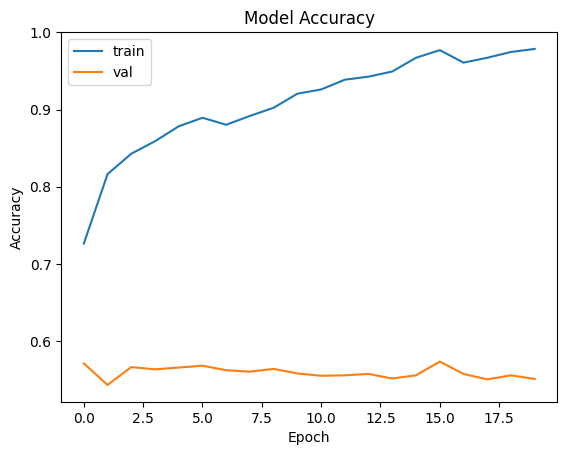

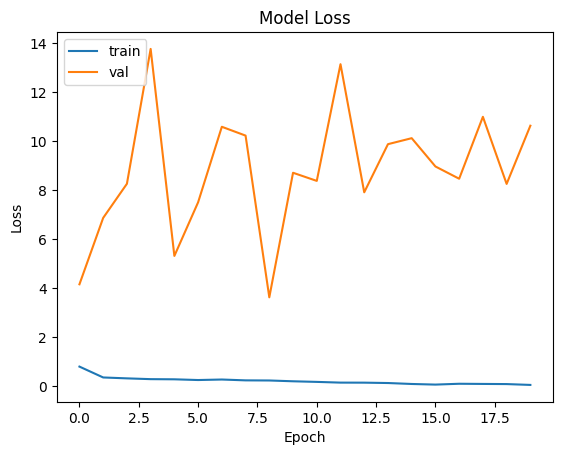

In [ ]:
import matplotlib.pyplot as plt

# Get the training and validation metrics over epochs
accu1 = history.history['accuracy']
val_acc1 = history.history['val_accuracy']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

# Plot accuracy over epochs
plt.plot(accu1)
plt.plot(val_acc1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss over epochs
plt.plot(loss1)
plt.plot(val_loss1)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


### Loading the trained model for testing dataset


In [ ]:
model.load_weights("/content/drive/MyDrive/machine learning weights/cnn_weights.h5")

In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/machine learning weights/cnn_weights.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, cohen_kappa_score

test_pred = model.predict(test_batches)
test_labels = test_batches.classes

acc1 = accuracy_score(test_labels, np.argmax(test_pred, axis=-1))

prec1 = precision_score(test_labels, np.argmax(test_pred, axis=-1), average='weighted')

f11 = f1_score(test_labels, np.argmax(test_pred, axis=-1), average='weighted')

sensitivity1 = recall_score(test_labels, np.argmax(test_pred, axis=-1), average='weighted')

auc1 = roc_auc_score(test_batches.labels, test_pred, multi_class='ovr', average='weighted')

kappa1 = cohen_kappa_score(test_labels, np.argmax(test_pred, axis=-1))


106/106 [==============================] - 28s 265ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, np.argmax(test_pred, axis=-1)))
print("Validation Accuracy of the model: ",acc1)
print("Precision of the model: ",prec1)
print("f1 score of the model: ",f11)
print("Recall score of the model: ",sensitivity1)
print("AUC of the model: ",auc1)
print("Kappa of the model: ",kappa1)

              precision    recall  f1-score   support

           0       0.40      0.15      0.22       415
           1       0.96      0.99      0.98       439
           2       0.12      0.01      0.03       402
           3       0.41      0.99      0.58       429

    accuracy                           0.55      1685
   macro avg       0.48      0.54      0.45      1685
weighted avg       0.48      0.55      0.46      1685

Validation Accuracy of the model:  0.5507418397626113
Precision of the model:  0.4845186076430551
f1 score of the model:  0.463490534377782
Recall score of the model:  0.5507418397626113
AUC of the model:  0.7692750063266072
Kappa of the model:  0.39701776595754745


## EfficientNetV2 architecture

In [ ]:

tf.keras.applications.EfficientNetV2B0(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    include_preprocessing=True,
)


29403144/29403144 [==============================] - 2s 0us/step


## Training EfficientNetV2

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau


# Load the pre-trained EfficientNetV2 model
base_model = EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=(512, 512, 3))

# Add new layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the first layer of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False
    break;


# Compile the model


lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=3)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_batches, validation_data=validation_batches, epochs=20,callbacks=[lr_scheduler])


24274472/24274472 [==============================] - 1s 0us/step
Epoch 1/20
159/159 [==============================] - 164s 705ms/step - loss: 0.4131 - accuracy: 0.8456 - val_loss: 3.2671 - val_accuracy: 0.5703 - lr: 0.0010
Epoch 2/20
159/159 [==============================] - 107s 672ms/step - loss: 0.1952 - accuracy: 0.9340 - val_loss: 2.1438 - val_accuracy: 0.3810 - lr: 0.0010
Epoch 3/20
159/159 [==============================] - 107s 675ms/step - loss: 0.1448 - accuracy: 0.9487 - val_loss: 3.2474 - val_accuracy: 0.2481 - lr: 0.0010
Epoch 4/20
159/159 [==============================] - 121s 761ms/step - loss: 0.1576 - accuracy: 0.9415 - val_loss: 7.7173 - val_accuracy: 0.2463 - lr: 0.0010
Epoch 5/20
159/159 [==============================] - 108s 679ms/step - loss: 0.1889 - accuracy: 0.9313 - val_loss: 3.3113 - val_accuracy: 0.2611 - lr: 0.0010
Epoch 6/20
159/159 [==============================] - 108s 678ms/step - loss: 0.0955 - accuracy: 0.9684 - val_loss: 1.0710 - val_accuracy: 0

In [ ]:
model.save_weights("/EffecientNetV2_weights.h5")

## Results

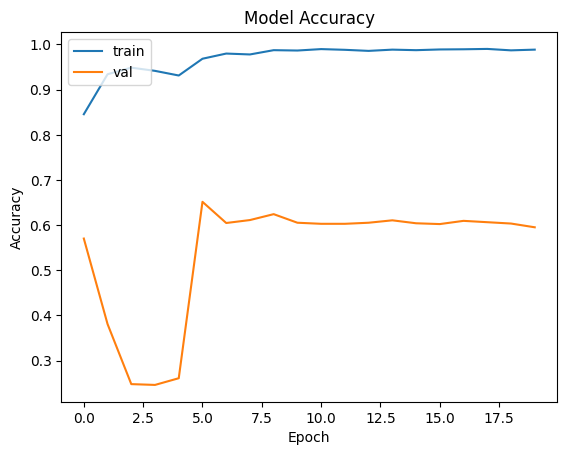

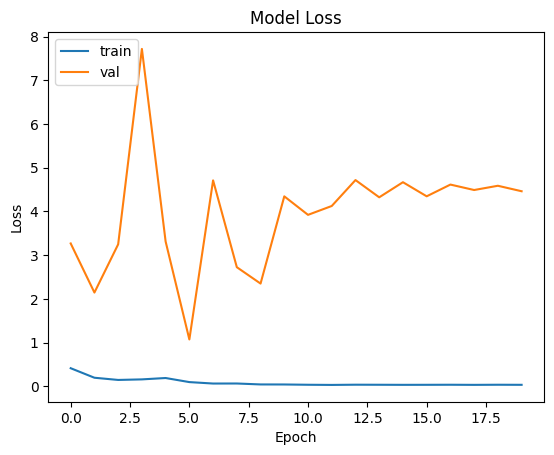

In [ ]:
import matplotlib.pyplot as plt

# Get the training and validation metrics over epochs
acc2 = history.history['accuracy']
val_acc2 = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

# Plot accuracy over epochs
plt.plot(acc2)
plt.plot(val_acc2)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss over epochs
plt.plot(loss2)
plt.plot(val_loss2)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Loading the trained model for testing dataset


In [ ]:
model.load_weights("/content/drive/MyDrive/machine learning weights/EffecientNetV2_weights.h5")

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, cohen_kappa_score
from sklearn.metrics import classification_report
test_pred = model.predict(test_batches)
test_labels = test_batches.classes

acc = accuracy_score(test_labels, np.argmax(test_pred, axis=-1))

prec = precision_score(test_labels, np.argmax(test_pred, axis=-1), average='weighted')

f1 = f1_score(test_labels, np.argmax(test_pred, axis=-1), average='weighted')

sensitivity = recall_score(test_labels, np.argmax(test_pred, axis=-1), average='weighted')

auc = roc_auc_score(test_batches.labels, test_pred, multi_class='ovr', average='weighted')

kappa = cohen_kappa_score(test_labels, np.argmax(test_pred, axis=-1))

print(classification_report(test_labels, np.argmax(test_pred, axis=-1)))
print("Accuracy is found to be :",acc)
print("Precision is found to be :",prec)
print("F1 is found to be :",f1)
print("Sensitivity is found to be :",sensitivity)
print("AuC is found to be :",auc)
print("Kappa is found to be :",kappa)

106/106 [==============================] - 37s 314ms/step
              precision    recall  f1-score   support

           0       0.60      0.27      0.37       415
           1       0.98      1.00      0.99       439
           2       0.85      0.05      0.10       402
           3       0.42      1.00      0.59       429

    accuracy                           0.60      1685
   macro avg       0.71      0.58      0.51      1685
weighted avg       0.71      0.60      0.53      1685

Accuracy is found to be : 0.5952522255192878
Precision is found to be : 0.7124427604224505
F1 is found to be : 0.5253577005175502
Sensitivity is found to be : 0.5952522255192878
AuC is found to be : 0.8657475562519257
Kappa is found to be : 0.45671474983264193


## MobileNetV3Large

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau


tf.keras.applications.MobileNetV3Large(
    input_shape=None,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

22661472/22661472 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau


# Load the pre-trained EfficientNetV2 model
base_model = MobileNetV3Large(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Add new layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the first layer of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False
    break;

# Compile the model


lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=3)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_batches, validation_data=validation_batches, epochs=20,callbacks=[lr_scheduler])


12683000/12683000 [==============================] - 1s 0us/step
Epoch 1/20
159/159 [==============================] - 135s 597ms/step - loss: 0.3029 - accuracy: 0.9001 - val_loss: 6.1566 - val_accuracy: 0.2463 - lr: 0.0010
Epoch 2/20
159/159 [==============================] - 79s 496ms/step - loss: 0.1351 - accuracy: 0.9573 - val_loss: 13.1346 - val_accuracy: 0.2463 - lr: 0.0010
Epoch 3/20
159/159 [==============================] - 79s 497ms/step - loss: 0.1179 - accuracy: 0.9676 - val_loss: 4.3000 - val_accuracy: 0.2510 - lr: 0.0010
Epoch 4/20
159/159 [==============================] - 77s 487ms/step - loss: 0.1009 - accuracy: 0.9676 - val_loss: 3.6032 - val_accuracy: 0.2386 - lr: 0.0010
Epoch 5/20
159/159 [==============================] - 79s 497ms/step - loss: 0.0557 - accuracy: 0.9830 - val_loss: 11.2393 - val_accuracy: 0.2463 - lr: 0.0010
Epoch 6/20
159/159 [==============================] - 91s 575ms/step - loss: 0.0435 - accuracy: 0.9850 - val_loss: 4.5817 - val_accuracy: 0.24

In [ ]:
model.save_weights("/MobileNetV3L_weights.h5")

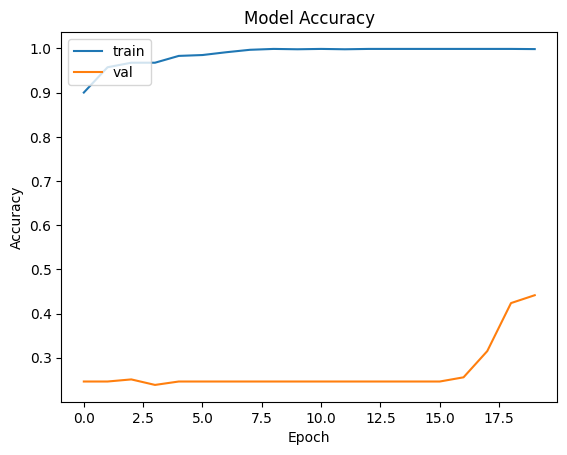

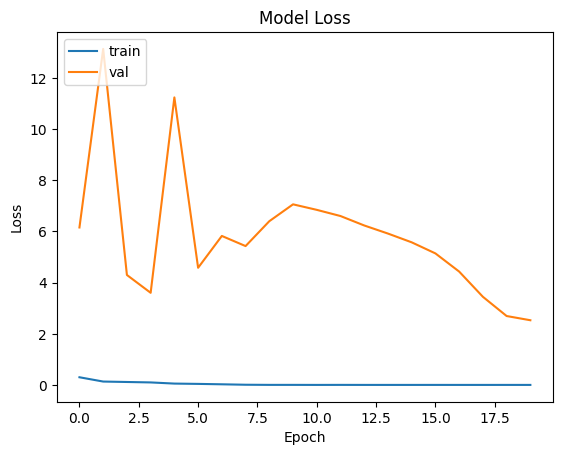

In [ ]:
import matplotlib.pyplot as plt


# Get the training and validation metrics over epochs
acc3 = history.history['accuracy']
val_acc3 = history.history['val_accuracy']
loss3 = history.history['loss']
val_loss3 = history.history['val_loss']

# Plot accuracy over epochs
plt.plot(acc3)
plt.plot(val_acc3)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss over epochs
plt.plot(loss3)
plt.plot(val_loss3)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Loading the trained model for testing dataset


In [ ]:
model.load_weights("/content/drive/MyDrive/machine learning weights/MobileNetV3L_weights.h5")

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, cohen_kappa_score
from sklearn.metrics import classification_report

test_pred = model.predict(test_batches)
test_labels = test_batches.classes

acc = accuracy_score(test_labels, np.argmax(test_pred, axis=-1))

prec = precision_score(test_labels, np.argmax(test_pred, axis=-1), average='weighted')

f1 = f1_score(test_labels, np.argmax(test_pred, axis=-1), average='weighted')

sensitivity = recall_score(test_labels, np.argmax(test_pred, axis=-1), average='weighted')

auc = roc_auc_score(test_batches.labels, test_pred, multi_class='ovr', average='weighted')

kappa = cohen_kappa_score(test_labels, np.argmax(test_pred, axis=-1))

print(classification_report(test_labels, np.argmax(test_pred, axis=-1)))
print("Accuracy is found to be :",acc)
print("Precision is found to be :",prec)
print("F1 is found to be :",f1)
print("Sensitivity is found to be :",sensitivity)
print("AuC is found to be :",auc)
print("Kappa is found to be :",kappa)

106/106 [==============================] - 29s 270ms/step
              precision    recall  f1-score   support

           0       0.35      0.57      0.43       415
           1       1.00      0.24      0.39       439
           2       1.00      0.01      0.01       402
           3       0.45      0.93      0.60       429

    accuracy                           0.44      1685
   macro avg       0.70      0.44      0.36      1685
weighted avg       0.70      0.44      0.36      1685

Accuracy is found to be : 0.44154302670623147
Precision is found to be : 0.6982965650313504
F1 is found to be : 0.3641797748309849
Sensitivity is found to be : 0.44154302670623147
AuC is found to be : 0.7710550081094588
Kappa is found to be : 0.2538553446363523


## Comparing the performance of the models

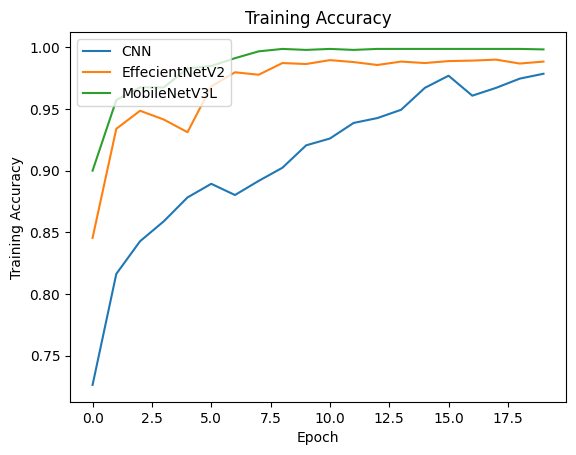

In [ ]:
# Plot accuracy over epochs
plt.plot(accu1)
plt.plot(acc2)
plt.plot(acc3)
plt.title('Training Accuracy')
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.legend(['CNN', 'EffecientNetV2','MobileNetV3L'], loc='upper left')
plt.show()

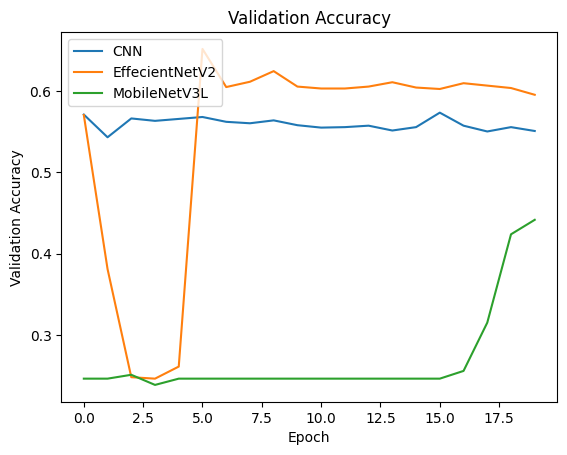

In [ ]:
# Plot accuracy over epochs
plt.plot(val_acc1)
plt.plot(val_acc2)
plt.plot(val_acc3)
plt.title('Validation Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['CNN', 'EffecientNetV2','MobileNetV3L'], loc='upper left')
plt.show()

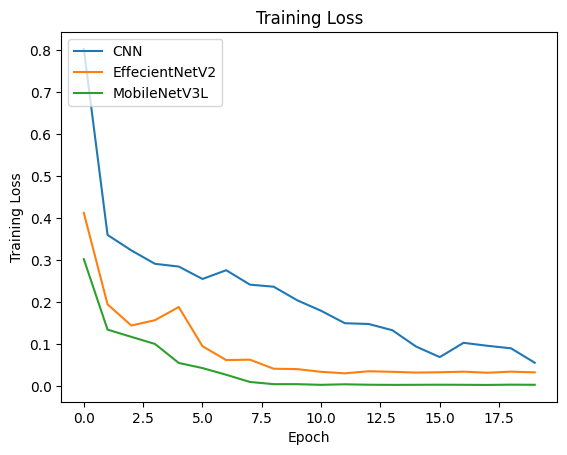

In [ ]:
# Plot accuracy over epochs
plt.plot(loss1)
plt.plot(loss2)
plt.plot(loss3)
plt.title('Training Loss')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.legend(['CNN', 'EffecientNetV2','MobileNetV3L'], loc='upper left')
plt.show()

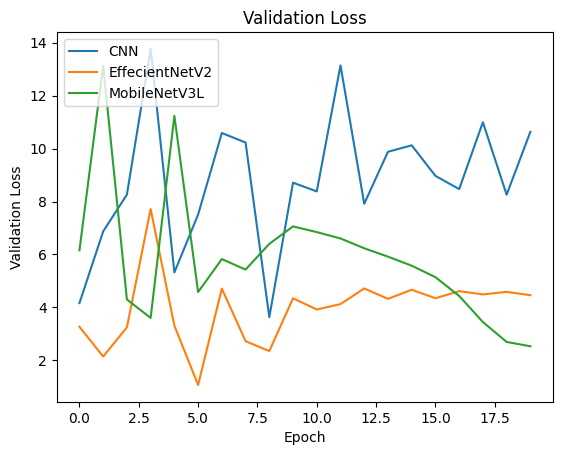

In [ ]:
# Plot accuracy over epochs
plt.plot(val_loss1)
plt.plot(val_loss2)
plt.plot(val_loss3)
plt.title('Validation Loss')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(['CNN', 'EffecientNetV2','MobileNetV3L'], loc='upper left')
plt.show()